In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False


In [2]:
# 원본데이터
data =  {'eng':[10,30,50,70],
         'kor':[20,40,60,80],
         'math':[90,50,20,70]}
df = pd.DataFrame(data, index=['a','b','c','d'] )
df

,eng,kor,math
a,10,20,90
b,30,40,50
c,50,60,20
d,70,80,70


## 데이터프레임 통계함수 디폴트( 컬럼별) axis=1 (row별)


In [3]:
df.sum() # 컬럼별 총 합. 결과는 시리즈

eng     160
kor     200
math    230
dtype: int64

In [4]:
df.sum(axis=1) # 행별 총합

a    120
b    120
c    130
d    220
dtype: int64

In [7]:
# 데이터 전체의 총합
df.sum().sum()
df.values.sum()

590

In [8]:
df.mean() # 컬럼별 평균

eng     40.0
kor     50.0
math    57.5
dtype: float64

In [9]:
df.mean(axis=1)  # 로우별 평균

a    40.000000
b    40.000000
c    43.333333
d    73.333333
dtype: float64

In [10]:
df.max() # 컬럼별 가장 큰값

eng     70
kor     80
math    90
dtype: int64

In [11]:
df.max(axis=1) # 로우별 가장 큰값

a    90
b    50
c    60
d    80
dtype: int64

In [12]:
df.max().max() #전체 가장 큰 값

90

## DataFrame --> Series 로 변환 : unstack

In [14]:
sr = df.unstack()
sr

eng   a    10
      b    30
      c    50
      d    70
kor   a    20
      b    40
      c    60
      d    80
math  a    90
      b    50
      c    20
      d    70
dtype: int64

In [15]:
sr.index # 멀티인덱스

MultiIndex([( 'eng', 'a'),
            ( 'eng', 'b'),
            ( 'eng', 'c'),
            ( 'eng', 'd'),
            ( 'kor', 'a'),
            ( 'kor', 'b'),
            ( 'kor', 'c'),
            ( 'kor', 'd'),
            ('math', 'a'),
            ('math', 'b'),
            ('math', 'c'),
            ('math', 'd')],
           )

In [16]:
sr.values

array([10, 30, 50, 70, 20, 40, 60, 80, 90, 50, 20, 70], dtype=int64)

In [17]:
df.unstack().max()  # 전체에서 최대값
# df.max().max()
# df.values.max()

90

In [18]:
df.median()  # 컬럼별 중앙값

eng     40.0
kor     50.0
math    60.0
dtype: float64

In [19]:
df.median(axis=1)  # 로우별 중앙값

a    20.0
b    40.0
c    50.0
d    70.0
dtype: float64

In [23]:
df.unstack().median()  # 전체 중앙값
np.median(df.values)

50.0

In [24]:
df.min()  # 컬럼별 가장 작은 값

eng     10
kor     20
math    20
dtype: int64

In [25]:
df.min(axis=1)  # 로우별 가장 작은 값

a    10
b    30
c    20
d    70
dtype: int64

In [26]:
df.idxmax() # 컬럼별 가장 큰 값의 인덱스

eng     d
kor     d
math    a
dtype: object

In [27]:
df.idxmax(axis=1) # 로우별 가장 큰 값의 인덱스

a    math
b    math
c     kor
d     kor
dtype: object

In [28]:
df.std()  #컬럼별 표준편차

eng     25.819889
kor     25.819889
math    29.860788
dtype: float64

In [29]:
df.std(axis=1)  #로우별 표준편차

a    43.588989
b    10.000000
c    20.816660
d     5.773503
dtype: float64

In [30]:
df.quantile()  # 컬럼별 50% 에 해당되는 값

eng     40.0
kor     50.0
math    60.0
Name: 0.5, dtype: float64

In [31]:
df.quantile(q=[0.25,0.5,0.75])  # 컬럼별 25%,50%,75% 에 해당되는 값

,eng,kor,math
0.25,25.0,35.0,42.5
0.50,40.0,50.0,60.0
0.75,55.0,65.0,75.0


In [32]:
df.count() #컬럼별 개수

eng     4
kor     4
math    4
dtype: int64

In [33]:
df.corr() # 상관계수

,eng,kor,math
eng,1.000000,1.000000,-0.389104
kor,1.000000,1.000000,-0.389104
math,-0.389104,-0.389104,1.000000


In [34]:
df.describe() # 전체 통계 요약

,eng,kor,math
count,4.000000,4.000000,4.000000
mean,40.000000,50.000000,57.500000
std,25.819889,25.819889,29.860788
min,10.000000,20.000000,20.000000
25%,25.000000,35.000000,42.500000
50%,40.000000,50.000000,60.000000
75%,55.000000,65.000000,75.000000
max,70.000000,80.000000,90.000000


In [36]:
def fn( v ):
    print('================')
    print( v )
    print('================')
    return v.sum()

In [37]:
df.apply(fn)

a    10
b    30
c    50
d    70
Name: eng, dtype: int64
a    20
b    40
c    60
d    80
Name: kor, dtype: int64
a    90
b    50
c    20
d    70
Name: math, dtype: int64


eng     160
kor     200
math    230
dtype: int64

In [38]:
df.apply(fn,axis=1)

eng     10
kor     20
math    90
Name: a, dtype: int64
eng     30
kor     40
math    50
Name: b, dtype: int64
eng     50
kor     60
math    20
Name: c, dtype: int64
eng     70
kor     80
math    70
Name: d, dtype: int64


a    120
b    120
c    130
d    220
dtype: int64

In [41]:
#  국어,영어,수학점수의 평균이 70점이상이면
# '합격' 아니면 '불합격' 인 시리즈를 구하시요

df.apply(lambda v:"합격" if v.mean()>=70 else "불합격",axis=1)

a    불합격
b    불합격
c    불합격
d     합격
dtype: object

In [42]:
df.nlargest(n=2,columns='eng')  # eng top2

,eng,kor,math
d,70,80,70
c,50,60,20


## 시각화

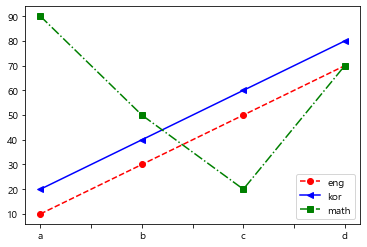

In [44]:
df.plot(style = ['ro--','b<-','gs-.'])
plt.show()

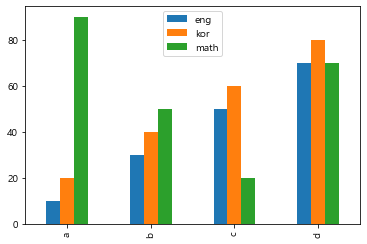

In [46]:
df.plot(kind='bar')
plt.show()  # 가장 높은 점수를 알 수 있음

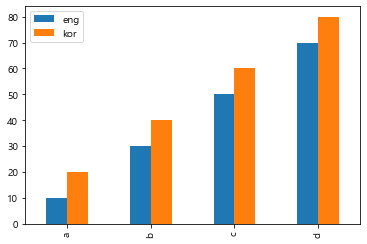

In [47]:
df.plot(y=['eng','kor'], kind='bar')
plt.show()

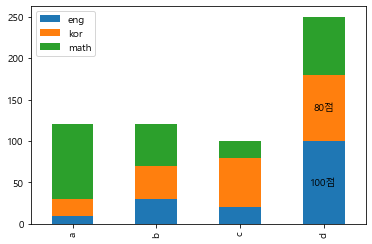

In [69]:
df.plot(kind='bar',stacked=True)
plt.text(3,100/2,'100점',va='center',ha='center')
plt.text(3,80/2+100,'80점',va='center',ha='center')

plt.show()   # 총점이 가장 높은 사람을 알 수 있음. 비율도 알 수 있음

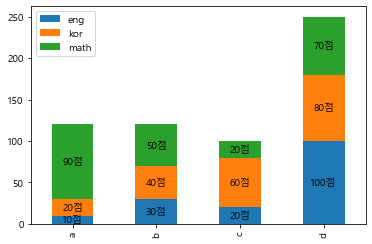

In [74]:
df.plot(kind='bar',stacked=True)

idx=0
for i,sr in df.iterrows():
    e,k,m = sr['eng'],sr['kor'],sr['math']
    plt.text(idx,e/2,f'{e}점',va='center',ha='center')
    plt.text(idx,k/2+e,f'{k}점',va='center',ha='center')
    plt.text(idx,m/2+e+k,f'{m}점',va='center',ha='center')
    idx +=1
plt.show()

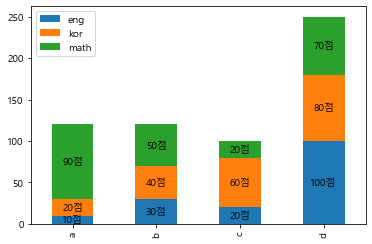

In [71]:
df.plot(kind='bar', stacked=True)
for i in range(len(df)):
    
    plt.text(i, df.iloc[i][0]/2, f'{df.iloc[i][0]}점', va='center', ha='center')
    plt.text(i, df.iloc[i][1]/2 + df.iloc[i][0], f'{df.iloc[i][1]}점', va='center', ha='center')
    plt.text(i, df.iloc[i][2]/2 + df.iloc[i][0] + df.iloc[i][1], f'{df.iloc[i][2]}점', va='center', ha='center')    
plt.show()


In [70]:
df

,eng,kor,math
a,10,20,90
b,30,40,50
c,20,60,20
d,100,80,70


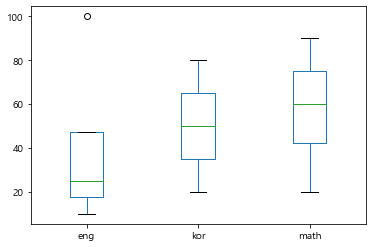

In [53]:
df.plot(kind='box')
plt.show()

In [54]:
df['eng'].quantile( [0.25,0.5,0.75])


0.25    17.5
0.50    25.0
0.75    47.5
Name: eng, dtype: float64

In [52]:
df.loc['d','eng'] = 100 # df수정
df.loc['c','eng'] = 20 # df수정


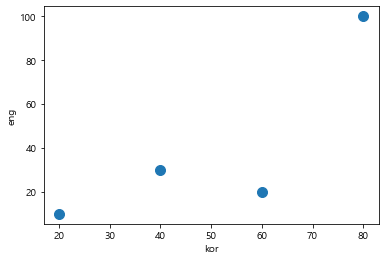

In [56]:
df.plot(kind='scatter', x='kor', y='eng',s=100) # s는 점 크기
plt.show()

In [57]:
for n in df: #df.columns
    print(n)

eng
kor
math


In [58]:
for n in df.index:
    print(n)

a
b
c
d


In [59]:
for n in df.items():
    print(n)

('eng', a     10
b     30
c     20
d    100
Name: eng, dtype: int64)
('kor', a    20
b    40
c    60
d    80
Name: kor, dtype: int64)
('math', a    90
b    50
c    20
d    70
Name: math, dtype: int64)


In [60]:
for c,sr in df.items():
    print(c)
    print(sr)
    print('=====')

eng
a     10
b     30
c     20
d    100
Name: eng, dtype: int64
=====
kor
a    20
b    40
c    60
d    80
Name: kor, dtype: int64
=====
math
a    90
b    50
c    20
d    70
Name: math, dtype: int64
=====


In [61]:
for c,sr in df.items():
    print(c)
    print(sr['a'],sr['b'],sr['c'],sr['d'])
    print('=====')

eng
10 30 20 100
=====
kor
20 40 60 80
=====
math
90 50 20 70
=====


In [62]:
for n in df.iterrows():
    print(n)

('a', eng     10
kor     20
math    90
Name: a, dtype: int64)
('b', eng     30
kor     40
math    50
Name: b, dtype: int64)
('c', eng     20
kor     60
math    20
Name: c, dtype: int64)
('d', eng     100
kor      80
math     70
Name: d, dtype: int64)


In [63]:
for i, sr in df.iterrows():
    print(i)
    print(sr)
    print('==========')

a
eng     10
kor     20
math    90
Name: a, dtype: int64
b
eng     30
kor     40
math    50
Name: b, dtype: int64
c
eng     20
kor     60
math    20
Name: c, dtype: int64
d
eng     100
kor      80
math     70
Name: d, dtype: int64


In [64]:
for i,sr in df.iterrows():
    print(i)
    print(sr['eng'],sr['kor'],sr['math'])
    print('=====')

a
10 20 90
=====
b
30 40 50
=====
c
20 60 20
=====
d
100 80 70
=====
